<a href="https://colab.research.google.com/github/chhak/DeepLearning/blob/master/tf14_auto_encoder_mnist_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 김철학
내용 : 딥러닝 오토인코더(AutoEncoder) MNIST 실습하기
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Encoder 모델구성
encoder_inputs = Input(shape=(784,))
encoder_hidden = Dense(32, activation='relu')(encoder_inputs)
encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Decoder 모델구성
decoder_inputs = Dense(2)(encoder_outputs)
decoder_hidden = Dense(32, activation='relu')(decoder_inputs)
decoder_outputs = Dense(784)(decoder_hidden)

#decoder_model = Model(decoder_inputs, decoder_outputs)
#decoder_model.summary()

In [ ]:
# 인코더, 디코더 모델 구성
auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_27 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_28 (Dense)             (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
_________________________________________________

In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train,
                 x_train,
                 epochs=10,
                 batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0665
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0538
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0514
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0505
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0497
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0490
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0483
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0477
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0472
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0469


In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[ 4.0347674e-03,  3.0373707e-03, -1.4452636e-04, ...,
         1.0766098e-03,  5.0526722e-03,  1.1129258e-03],
       [-4.8358832e-04, -5.8984570e-04,  7.1083009e-04, ...,
        -2.7226796e-04, -5.6838756e-04,  4.4318847e-05],
       [-8.4872916e-03, -4.0559247e-03,  4.2703096e-04, ...,
        -3.3989782e-03, -5.8078058e-03, -3.6990209e-03],
       ...,
       [ 1.4615753e-03,  3.4753270e-03,  5.7011843e-04, ...,
        -5.6591909e-04,  3.2984808e-03,  3.0883029e-04],
       [-5.5394750e-03, -1.5496314e-03,  4.8327912e-04, ...,
        -9.7599928e-04, -3.7541550e-03, -1.5325793e-03],
       [-2.2830674e-03,  6.8488717e-04, -3.6987104e-04, ...,
         2.7625635e-04, -3.5011210e-04,  2.7075782e-04]], dtype=float32)

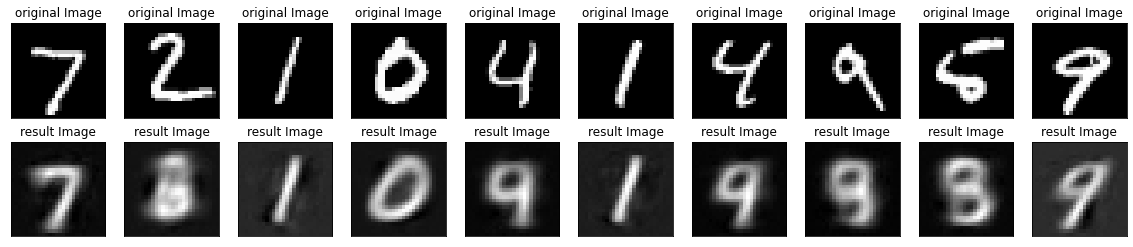

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
# 인코더 모델로 결과 출력
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[  3.6821275,   9.000625 ],
       [  1.4225823,  -3.9554927],
       [ -3.2867324,  -7.6265373],
       ...,
       [  8.338753 ,  10.647056 ],
       [ -1.4016844, -11.000867 ],
       [  4.68014  ,  -8.9139   ]], dtype=float32)

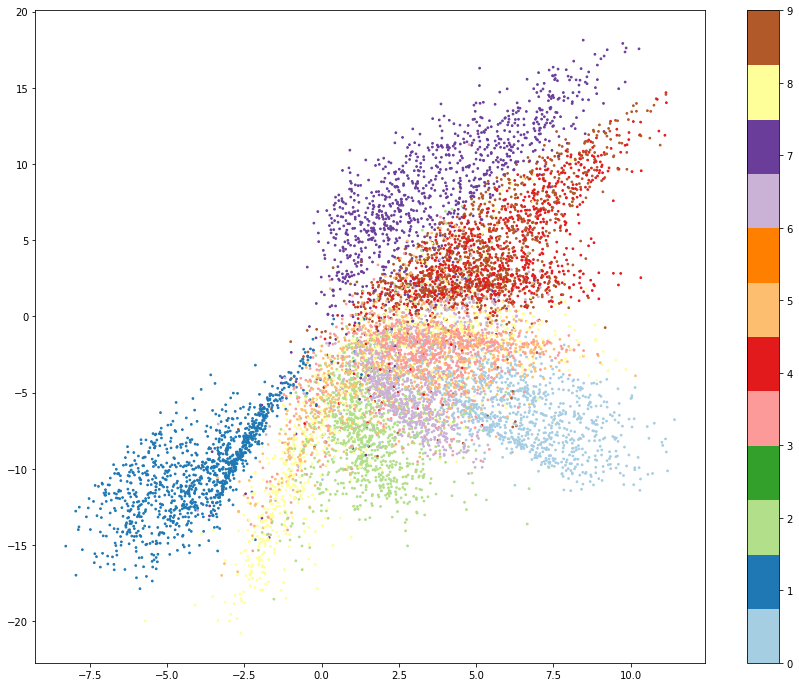

In [ ]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], 
            y=encoder_pre_result[:, 1], 
            c=y_test, 
            cmap=plt.get_cmap('Paired'),
            s=3)
plt.colorbar()
